# Bank Loan Analysis Project

#### Importing Libraries

In [27]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px     

#### Loading Dataset

In [30]:
df=pd.read_csv('financial_loan.csv')
df.sample(10)

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
11723,509214,MA,INDIVIDUAL,10+ years,IBM,C,RENT,10-04-2021,16-04-2021,11-11-2021,...,C2,36 months,Not Verified,53544.00,0.1407,60.75,0.1311,1800,23,2081
25215,863854,OH,INDIVIDUAL,10+ years,Pilkiington North America,A,MORTGAGE,11-08-2021,14-09-2021,14-09-2021,...,A1,36 months,Not Verified,120000.00,0.0715,437.32,0.0542,14500,28,15743
8342,1027758,MN,INDIVIDUAL,10+ years,Fairview Health Services,A,MORTGAGE,11-11-2021,16-04-2021,12-06-2021,...,A4,36 months,Not Verified,85000.00,0.1272,469.36,0.0790,15000,53,15367
24606,884223,FL,INDIVIDUAL,2 years,iGov Inc,B,RENT,11-09-2021,16-05-2021,16-05-2021,...,B4,60 months,Verified,125004.00,0.1858,500.24,0.1242,30000,29,27501
25687,524037,PA,INDIVIDUAL,4 years,Leeds,B,MORTGAGE,10-06-2021,14-01-2021,11-04-2021,...,B4,36 months,Not Verified,21000.00,0.1811,98.92,0.1149,3000,7,3256
35771,383164,GA,INDIVIDUAL,9 years,Beauty Mart Supplies,A,MORTGAGE,09-03-2021,12-07-2021,12-03-2021,...,A5,36 months,Not Verified,48000.00,0.2452,318.54,0.0963,9925,14,11467
31024,776547,CA,INDIVIDUAL,< 1 year,Kforce Professional / Kaiser Permanente,D,RENT,11-06-2021,16-03-2021,16-03-2021,...,D3,60 months,Verified,47839.92,0.1914,368.69,0.1649,15000,32,22061
4512,551889,IL,INDIVIDUAL,< 1 year,MSpace,E,RENT,10-07-2021,16-05-2021,12-04-2021,...,E1,36 months,Source Verified,65000.00,0.1215,530.70,0.1645,15000,12,18192
15571,892098,MI,INDIVIDUAL,8 years,ALLIANT CREDIT UNION,C,RENT,11-09-2021,16-05-2021,13-04-2021,...,C1,36 months,Source Verified,90000.00,0.1963,237.52,0.1349,7000,23,8127
3055,565538,CA,INDIVIDUAL,4 years,Stargate Studios,B,RENT,10-08-2021,13-08-2021,13-09-2021,...,B5,36 months,Not Verified,50000.00,0.1519,92.82,0.1186,2800,19,3342


#### Basic Analysis

In [31]:
df.isnull().sum()

id                          0
address_state               0
application_type            0
emp_length                  0
emp_title                1438
grade                       0
home_ownership              0
issue_date                  0
last_credit_pull_date       0
last_payment_date           0
loan_status                 0
next_payment_date           0
member_id                   0
purpose                     0
sub_grade                   0
term                        0
verification_status         0
annual_income               0
dti                         0
installment                 0
int_rate                    0
loan_amount                 0
total_acc                   0
total_payment               0
dtype: int64

In [32]:
df.shape

(38576, 24)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   application_type       38576 non-null  object 
 3   emp_length             38576 non-null  object 
 4   emp_title              37138 non-null  object 
 5   grade                  38576 non-null  object 
 6   home_ownership         38576 non-null  object 
 7   issue_date             38576 non-null  object 
 8   last_credit_pull_date  38576 non-null  object 
 9   last_payment_date      38576 non-null  object 
 10  loan_status            38576 non-null  object 
 11  next_payment_date      38576 non-null  object 
 12  member_id              38576 non-null  int64  
 13  purpose                38576 non-null  object 
 14  sub_grade              38576 non-null  object 
 15  te

In [34]:
# Identify the columns to be converted to datetime
date_cols=['issue_date','last_credit_pull_date','last_payment_date','next_payment_date']

# Convert the columns to datetime
for col in date_cols:
    df[col]=pd.to_datetime(df[col], format='%d-%m-%Y', errors='coerce')

# Verify the data types of the columns
print(df[date_cols].dtypes)

# Display the first 5 rows of the dataframe with the converted columns
print(df[date_cols].head())

issue_date               datetime64[ns]
last_credit_pull_date    datetime64[ns]
last_payment_date        datetime64[ns]
next_payment_date        datetime64[ns]
dtype: object
  issue_date last_credit_pull_date last_payment_date next_payment_date
0 2021-02-11            2021-09-13        2021-04-13        2021-05-13
1 2021-01-01            2021-12-14        2021-01-15        2021-02-15
2 2021-01-05            2021-12-12        2021-01-09        2021-02-09
3 2021-02-25            2021-12-12        2021-03-12        2021-04-12
4 2021-01-01            2021-12-14        2021-01-15        2021-02-15


In [35]:
df.to_csv('financial_loan.csv', index=False)

In [36]:
df.describe()

,id,issue_date,last_credit_pull_date,last_payment_date,next_payment_date,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,38576,38576,38576,38576,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,2021-07-16 02:31:35.562007040,2021-06-08 13:36:34.193280512,2021-06-26 09:52:08.909166080,2021-07-26 20:42:20.605557760,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
min,5.473400e+04,2021-01-01 00:00:00,2021-01-08 00:00:00,2021-01-08 00:00:00,2021-02-08 00:00:00,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,2021-04-11 00:00:00,2021-04-15 00:00:00,2021-03-16 00:00:00,2021-04-16 00:00:00,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,2021-07-11 00:00:00,2021-05-16 00:00:00,2021-06-14 00:00:00,2021-07-14 00:00:00,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,2021-10-11 00:00:00,2021-08-13 00:00:00,2021-09-15 00:00:00,2021-10-15 00:00:00,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,2021-12-12 00:00:00,2022-01-20 00:00:00,2021-12-15 00:00:00,2022-01-15 00:00:00,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000
std,2.113246e+05,NaN,NaN,NaN,NaN,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777


### Problem Solving

#### Total Loan Applications

In [37]:
total_loan_app=df['id'].count()
print('Total loan applicants:-',total_loan_app)

Total loan applicants:- 38576


#### MTD Loan Applications

In [38]:
latest_issue_date=df['issue_date'].max()
latest_year=latest_issue_date.year
latest_month=latest_issue_date.month

mtd_data=df[(df['issue_date'].dt.year==latest_year) & 
              (df['issue_date'].dt.month==latest_month)]
mtd_loan_app=mtd_data['id'].count()

print(f"MTD Loan Applications(for {latest_issue_date.strftime('%B %Y')}):- {mtd_loan_app}")

MTD Loan Applications(for December 2021):- 4314


#### Total Funded Amount

In [39]:
total_fund=df['loan_amount'].sum()/1000000
print('Total Funded Amount:- ${:.2f}M'.format(total_fund))

Total Funded Amount:- $435.76M


#### MTD - Total Funded Amount

In [40]:
latest_issue_date=df['issue_date'].max()
latest_year=latest_issue_date.year
latest_month=latest_issue_date.month

mtd_data=df[(df['issue_date'].dt.year==latest_year) & 
              (df['issue_date'].dt.month==latest_month)]

total_fund=mtd_data['loan_amount'].sum()/1000000

print('MTD Total Funded Amount:- ${:.2f}M'.format(total_fund))

MTD Total Funded Amount:- $53.98M


#### MTD Total Amount Received

In [41]:
latest_issue_date=df['issue_date'].max()
latest_year=latest_issue_date.year
latest_month=latest_issue_date.month

mtd_data=df[(df['issue_date'].dt.year==latest_year) & 
              (df['issue_date'].dt.month==latest_month)]

total_received=mtd_data['total_payment'].sum()/1000000

print('MTD Total Funded Amount:- ${:.2f}M'.format(total_received))

MTD Total Funded Amount:- $58.07M


#### Avg Interest Rate

In [42]:
avg_int_rate=df['int_rate'].mean()*100
print('Avg Interest Rate:- {:.2f}%'.format(avg_int_rate))

Avg Interest Rate:- 12.05%


#### Avg Debt-to-Income Ratio(DTI)

In [43]:
avg_dti=df['dti'].mean()*100
print('Avg DTI:- {:.2f}'.format(avg_dti))

Avg DTI:- 13.33


#### Good Loan Metrics

In [44]:
good_loans=df[df['loan_status'].isin(['Fully Paid','Current'])]

total_loan_app=df['id'].count()

good_loan_app=good_loans['id'].count()
good_loan_fund=good_loans['loan_amount'].sum()/1000000
good_loan_received=good_loans['total_payment'].sum()/1000000

gl_perc=(good_loan_app/total_loan_app)*100

print('Good Loan App:-',good_loan_app)
print('Good Loan Fund:- ${:.2f}M'.format(good_loan_fund))
print('Good Loan Received:- ${:.2f}M'.format(good_loan_received))
print('Perc of Good Loan App:- {:.2f}%'.format(gl_perc))


Good Loan App:- 33243
Good Loan Fund:- $370.22M
Good Loan Received:- $435.79M
Perc of Good Loan App:- 86.18%


#### Bad Loan Metrics

In [46]:
bad_loans=df[df['loan_status'].isin(['Charged Off'])]

total_loan_app=df['id'].count()

bad_loan_app=bad_loans['id'].count()
bad_loan_fund=bad_loans['loan_amount'].sum()/1000000
bad_loan_received=bad_loans['total_payment'].sum()/1000000

gl_perc=(bad_loan_app/total_loan_app)*100

print('Bad Loan App:-',bad_loan_app)
print('Bad Loan Fund:- ${:.2f}M'.format(bad_loan_fund))
print('Bad Loan Received:- ${:.2f}M'.format(bad_loan_received))
print('Perc of Bad Loan App:- {:.2f}%'.format(gl_perc))

Bad Loan App:- 5333
Bad Loan Fund:- $65.53M
Bad Loan Received:- $37.28M
Perc of Bad Loan App:- 13.82%


### Important Visual Charts

#### Total Funded Amount by Month

In [51]:
# Prepare the data for the plot
monthly_funded = (
    df.sort_values('issue_date')
    .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
    .groupby('month_name', sort=False)['loan_amount']
    .sum()
    .div(1000000)
    .reset_index(name='total_fund')
)

# Create an interactive area plot with Plotly Express
fig = px.area(
    monthly_funded,
    x='month_name',
    y='total_fund',
    title='Total Funded Amount by Month',
    labels={'month_name': 'Month', 'total_fund': 'Funded Amount (in Millions)'},
    markers=True,
    text=monthly_funded['total_fund'].apply(lambda x: f'{x:.2f}M')
)

# Update layout for a cleaner look
fig.update_layout(
    xaxis_tickangle=-45,
    yaxis_title='Funded Amount (in Millions)',
    xaxis_title='Month',
    template='plotly_white',
    hovermode='x unified'
)

# Update traces for text labels
fig.update_traces(
    textposition='top center'
)

# Show the plot
fig.show()

#### Total Amount Received by Month

In [54]:
# Prepare the data for the plot
monthly_funded = (
    df.sort_values('issue_date')
    .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
    .groupby('month_name', sort=False)['total_payment']
    .sum()
    .div(1000000)
    .reset_index(name='total_received')
)

# Create an interactive area plot with Plotly Express
fig = px.area(
    monthly_funded,
    x='month_name',
    y='total_received',
    title='Total Amount Received by Month',
    labels={'month_name': 'Month', 'total_received': 'Received Amount (in Millions)'},
    markers=True,
    text=monthly_funded['total_received'].apply(lambda x: f'{x:.2f}M')
)

# Update layout for a cleaner look
fig.update_layout(
    xaxis_tickangle=-45,
    yaxis_title='Amount Received (in Millions)',
    xaxis_title='Month',
    template='plotly_white',
    hovermode='x unified'
)

# Update traces for text labels
fig.update_traces(
    textposition='top center'
)

# Show the plot
fig.show()

#### Total Applications Received by Month

In [60]:
# Prepare the data for the plot
monthly_appln = (
    df.sort_values('issue_date')
    .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
    .groupby('month_name', sort=False)['id']
    .count()
    .reset_index(name='total_loan_app')
)

# Create an interactive area plot with Plotly Express
fig = px.area(
    monthly_appln,
    x='month_name',
    y='total_loan_app',
    title='Total Applications Received by Month',
    labels={'month_name': 'Month', 'total_loan_app': 'Total Applications'},
    markers=True,
    text=monthly_appln['total_loan_app'].apply(lambda x: f'{x:.0f}')
)

# Update layout for a cleaner look
fig.update_layout(
    xaxis_tickangle=-45,
    yaxis_title='Total Applications',
    xaxis_title='Month',
    template='plotly_white',
    hovermode='x unified'
)

# Update traces for text labels
fig.update_traces(
    textposition='top center'
)

# Show the plot
fig.show()

#### Regional Analysis by State for Total Funded Amount

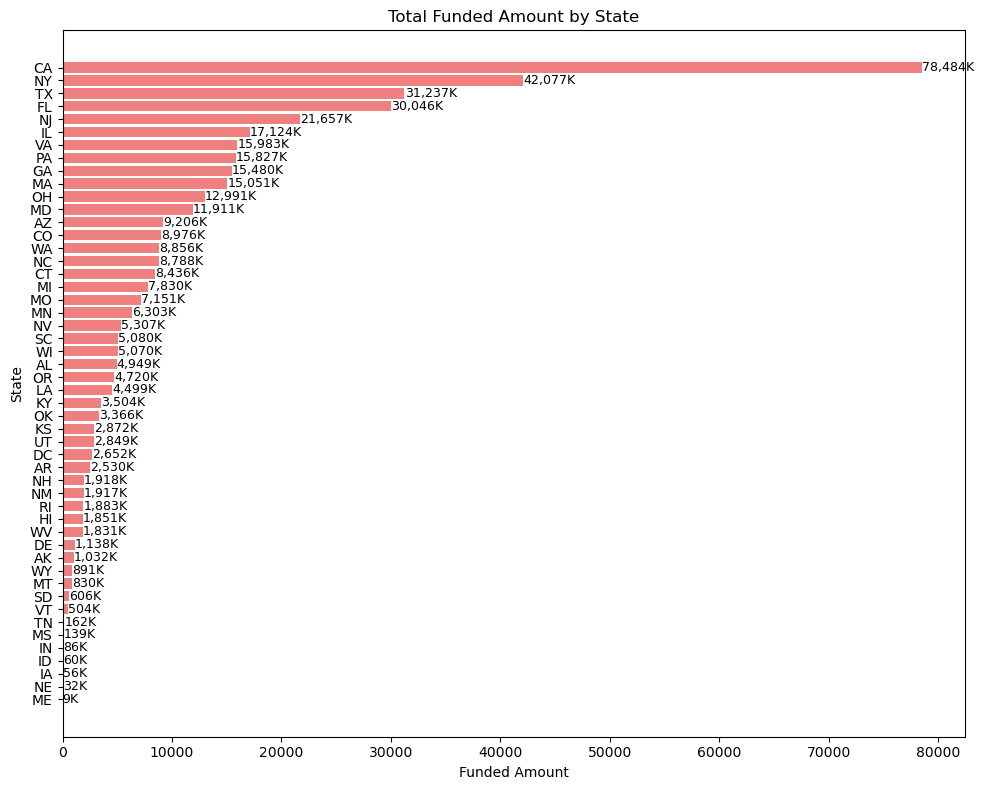

In [61]:
state_fund=(df.groupby('address_state')['loan_amount'].sum().sort_values(ascending=True))/1000

plt.figure(figsize=(10,8))
bars=plt.barh(state_fund.index,state_fund.values,color='lightcoral')

for bar in bars:
    width=bar.get_width()
    plt.text(width+10,bar.get_y()+bar.get_height()/2,
             f'{width:,.0f}K',va='center',fontsize=9)
    
plt.title('Total Funded Amount by State')
plt.xlabel('Funded Amount')
plt.ylabel('State')
plt.tight_layout()
plt.show()    

#### Loan Term Analysis

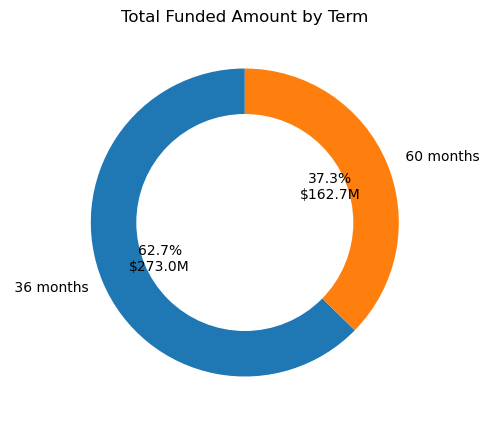

In [64]:
term_fund=df.groupby('term')['loan_amount'].sum()/1000000

plt.figure(figsize=(5,5))
plt.pie(
    term_fund,
    labels=term_fund.index,
    autopct=lambda p: f"{p:.1f}%\n${p*sum(term_fund)/100:.1f}M",
    startangle=90,
    wedgeprops={'width':0.4}
)
plt.gca().add_artist(plt.Circle((0,0),0.70,color='white'))
plt.title('Total Funded Amount by Term')
plt.show()

#### Emp Length by Funding

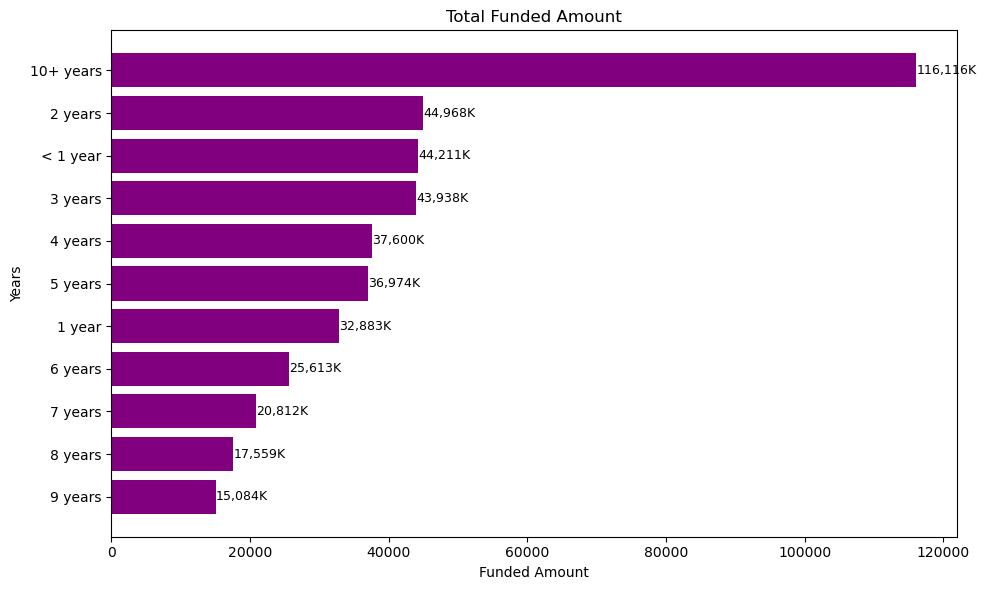

In [71]:
emp_fund=df.groupby('emp_length')['loan_amount'].sum().sort_values()/1000

plt.figure(figsize=(10,6))
bars=plt.barh(emp_fund.index,emp_fund.values,color='purple')

for bar in bars:
    width=bar.get_width()
    plt.text(width+10,bar.get_y()+bar.get_height()/2,
             f'{width:,.0f}K',va='center',fontsize=9)
    
plt.title('Total Funded Amount')
plt.xlabel('Funded Amount')
plt.ylabel('Years')
plt.tight_layout()
plt.show() 

#### Total Funded Amount by Purpose

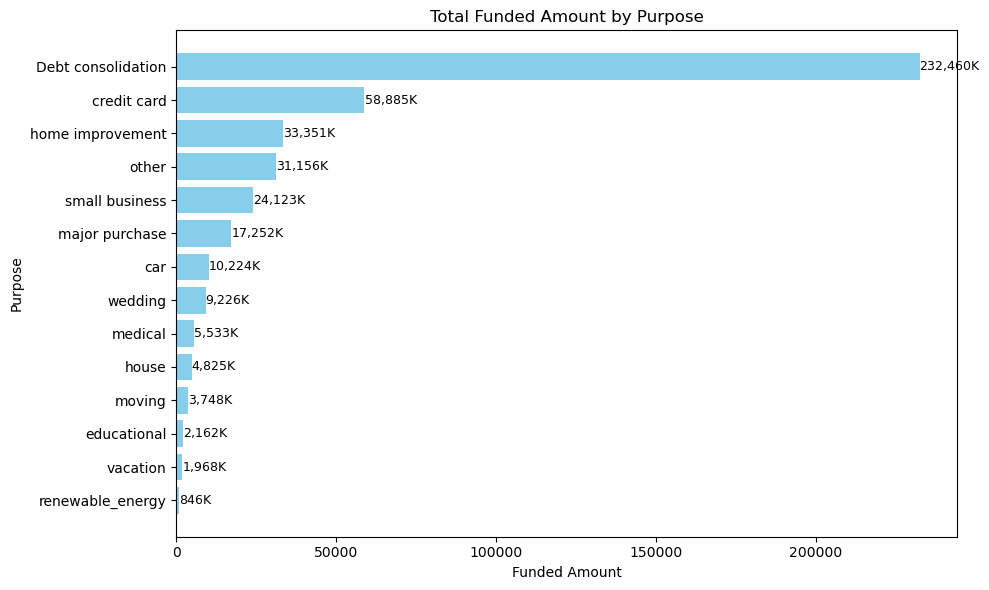

In [75]:
purpose_fund=df.groupby('purpose')['loan_amount'].sum().sort_values()/1000

plt.figure(figsize=(10,6))
bars=plt.barh(purpose_fund.index,purpose_fund.values,color='skyblue')

for bar in bars:
    width=bar.get_width()
    plt.text(width+10,bar.get_y()+bar.get_height()/2,
             f'{width:,.0f}K',va='center',fontsize=9)
    
plt.title('Total Funded Amount by Purpose')
plt.xlabel('Funded Amount')
plt.ylabel('Purpose')
plt.tight_layout()
plt.show() 

#### Home Ownerships

In [78]:
home_fund=df.groupby('home_ownership')['loan_amount'].sum().reset_index()
home_fund['loan_amount_mil']=home_fund['loan_amount']/1_000_000
fig=px.treemap(
    home_fund,
    path=['home_ownership'],
    values='loan_amount_mil',
    color='loan_amount_mil',
    color_continuous_scale='Blues',
    title='Total Funded Amount by Home Ownership'
)

fig.show()